In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets, layers, models

In [4]:
(X_train, y_train ), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
len(X_test)

10000

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
classes = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [9]:
classes[1]

'Automobile'

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

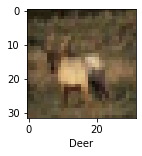

In [11]:
plot_sample(X_train,y_train,3)

In [12]:
# Normalizing the training and testing data
X_train = X_train / 255
X_test = X_test / 255

In [13]:
# Artificial Neural Network model
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ANN.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ANN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9963 - accuracy: 0.2763
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.7351 - accuracy: 0.3829
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6352 - accuracy: 0.4175
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5855 - accuracy: 0.4395
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5257 - accuracy: 0.4600
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4849 - accuracy: 0.4769
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4437 - accuracy: 0.4920
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4148 - accuracy: 0.4981
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3886 - accuracy: 0.5086
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.

In [14]:
ANN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4907 - accuracy: 0.4621


[1.4907286167144775, 0.46209999918937683]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ANN.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report: \n', classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.38      0.48      1000
           1       0.67      0.53      0.59      1000
           2       0.37      0.33      0.35      1000
           3       0.41      0.20      0.27      1000
           4       0.37      0.50      0.42      1000
           5       0.36      0.48      0.41      1000
           6       0.54      0.51      0.53      1000
           7       0.72      0.40      0.51      1000
           8       0.37      0.86      0.51      1000
           9       0.60      0.45      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [22]:
# Convolutional Neural Network model
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CNN.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 41s 24ms/step - loss: 1.7255 - accuracy: 0.3684
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1776 - accuracy: 0.5856
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0155 - accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9176 - accuracy: 0.6828
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8615 - accuracy: 0.7017
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7996 - accuracy: 0.7249
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7611 - accuracy: 0.7389
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7333 - accuracy: 0.7483
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6869 - accuracy: 0.7641
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [23]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 7s 12ms/step - loss: 0.9149 - accuracy: 0.6958


[0.9148946404457092, 0.6958000063896179]

In [24]:
y_test = y_test.reshape(-1,)

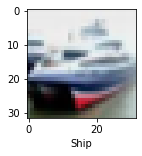

In [25]:
plot_sample(X_test, y_test, 1)

In [26]:
y_pred = CNN.predict(X_test)
y_pred

array([[2.15937616e-03, 3.43108288e-04, 1.13398314e-03, ...,
        6.06436442e-05, 2.76619583e-01, 2.87450710e-03],
       [1.53331235e-02, 8.46074894e-03, 1.35301816e-04, ...,
        1.26272930e-08, 9.75387752e-01, 6.77068077e-04],
       [9.60741118e-02, 3.71372998e-01, 4.68427315e-03, ...,
        2.36274139e-03, 4.62740451e-01, 4.32361998e-02],
       ...,
       [2.42655587e-05, 2.11711245e-04, 1.95791855e-01, ...,
        5.10505363e-02, 1.04313322e-05, 1.28294923e-04],
       [1.07144557e-01, 2.02010691e-01, 7.48818461e-03, ...,
        1.87373045e-03, 3.81090620e-04, 1.00155587e-04],
       [4.76268906e-06, 4.35697439e-05, 3.71497270e-04, ...,
        9.82262254e-01, 1.64500921e-06, 1.88953743e-06]], dtype=float32)

In [30]:
y_pred_cl = [np.argmax(element) for element in y_pred]
y_pred_cl[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [31]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

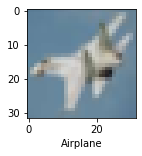

In [32]:
plot_sample(X_test, y_test, 10)

In [33]:
classes[y_pred_cl[10]]

'Deer'

In [35]:
print('Classification Report: \n',classification_report(y_test,y_pred_cl))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74      1000
           1       0.82      0.78      0.80      1000
           2       0.57      0.63      0.60      1000
           3       0.52      0.49      0.50      1000
           4       0.60      0.69      0.64      1000
           5       0.75      0.49      0.60      1000
           6       0.75      0.80      0.77      1000
           7       0.76      0.72      0.74      1000
           8       0.71      0.85      0.78      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

